In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Dog100.csv')

In [3]:
df.head()

,X,Y
0,23.002407,28.852272
1,22.867367,25.864346
2,23.158079,23.826321
3,23.472701,32.143325
4,23.582748,21.874339


In [7]:
df.dropna(inplace=True)

In [9]:
df = df.astype(int)

In [11]:
from scipy.sparse import lil_matrix

In [13]:
sparse_matrix = lil_matrix((100,100),dtype=int)

In [15]:
for _, row in df.iterrows():
    sparse_matrix[row['X'], row['Y']] = 1

In [17]:
sparse_matrix = sparse_matrix.tocsr()

In [19]:
sparse_matrix

<100x100 sparse matrix of type '<class 'numpy.int32'>'
	with 137 stored elements in Compressed Sparse Row format>

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [22]:
Xc , Yc = sparse_matrix.nonzero()

In [155]:
Xc

array([22, 23, 23, 23, 23, 24, 24, 25, 25, 26, 26, 27, 27, 29, 30, 32, 34,
       34, 34, 34, 35, 35, 35, 35, 36, 36, 37, 37, 39, 39, 41, 41, 42, 42,
       44, 44, 46, 46, 47, 48, 48, 49, 49, 49, 49, 49, 50, 50, 50, 50, 51,
       51, 51, 51, 51, 52, 52, 52, 52, 52, 53, 53, 53, 53, 54, 54, 54, 54,
       54, 54, 55, 55, 55, 56, 56, 57, 58, 59, 59, 60, 61, 61, 61, 61, 61,
       63, 63, 64, 64, 64, 64, 65, 65, 65, 65, 65, 66, 66, 66, 67, 67, 67,
       68, 68, 68, 68, 68, 69, 69, 69, 70, 70, 70, 70, 70, 70, 70, 70, 70,
       71, 71, 71, 71, 72, 73, 73, 75, 75, 76, 77, 78, 79, 79, 80, 80, 81,
       82])

In [157]:
Yc

array([25, 21, 23, 28, 32, 19, 34, 17, 36, 15, 38, 13, 39, 12, 11, 10,  9,
       24, 27, 29, 20, 22, 32, 34,  9, 36,  9, 38,  9, 40,  9, 42,  9, 44,
        9, 46,  9, 47, 49,  9, 35,  9, 52, 66, 69, 72, 34, 54, 64, 74,  9,
       16, 56, 59, 76, 17, 32, 61, 62, 78,  9, 15, 30, 62, 14, 20, 23, 26,
       28, 80,  9, 12, 62, 10, 81, 63, 82, 64, 83, 66,  9, 69, 71, 73, 83,
        9, 83, 19, 22, 25, 83,  9, 17, 27, 29, 63, 15, 31, 82,  9, 33, 62,
        9, 14, 35, 38, 81, 12, 40, 61, 10, 42, 44, 47, 53, 55, 57, 60, 80,
       49, 51, 61, 79, 77, 61, 75, 62, 75, 63, 74, 64, 66, 74, 69, 74, 71,
       73])

In [173]:
lst=[]
for i in range(0,136):
    a=[Xc[i],Yc[i]]
    lst.append(a)

In [179]:
lst_new=np.array(lst)

IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

<Axes: >

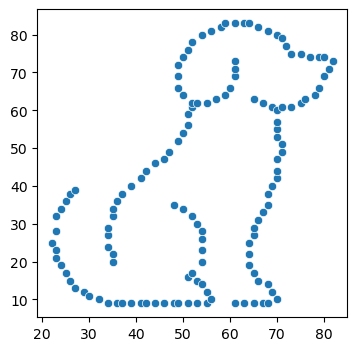

In [27]:
plt.figure(figsize=(4,4))
sns.scatterplot(x=Xc,y=Yc)

In [43]:
cd = sparse_matrix.get_shape()

In [153]:
print(sparse_matrix)

  (22, 25)	1
  (23, 21)	1
  (23, 23)	1
  (23, 28)	1
  (23, 32)	1
  (24, 19)	1
  (24, 34)	1
  (25, 17)	1
  (25, 36)	1
  (26, 15)	1
  (26, 38)	1
  (27, 13)	1
  (27, 39)	1
  (29, 12)	1
  (30, 11)	1
  (32, 10)	1
  (34, 9)	1
  (34, 24)	1
  (34, 27)	1
  (34, 29)	1
  (35, 20)	1
  (35, 22)	1
  (35, 32)	1
  (35, 34)	1
  (36, 9)	1
  :	:
  (70, 44)	1
  (70, 47)	1
  (70, 53)	1
  (70, 55)	1
  (70, 57)	1
  (70, 60)	1
  (70, 80)	1
  (71, 49)	1
  (71, 51)	1
  (71, 61)	1
  (71, 79)	1
  (72, 77)	1
  (73, 61)	1
  (73, 75)	1
  (75, 62)	1
  (75, 75)	1
  (76, 63)	1
  (77, 74)	1
  (78, 64)	1
  (79, 66)	1
  (79, 74)	1
  (80, 69)	1
  (80, 74)	1
  (81, 71)	1
  (82, 73)	1


In [147]:
print(sparse_matrix.getnnz())

137


In [151]:
mat1=np.array([[0,-1],[1,0]])
mat1

array([[ 0, -1],
       [ 1,  0]])

In [185]:
lst_res1=[]
for i in range (0,136):
    res=np.matmul(mat1,lst_new[i])
    lst_res1.append(res)
    
    

In [189]:
R90=pd.DataFrame(lst_res1)

In [195]:
R90.columns=['X','Y']
R90

,X,Y
0,-25,22
1,-21,23
2,-23,23
3,-28,23
4,-32,23
...,...,...
131,-66,79
132,-74,79
133,-69,80
134,-74,80


<Axes: xlabel='X', ylabel='Y'>

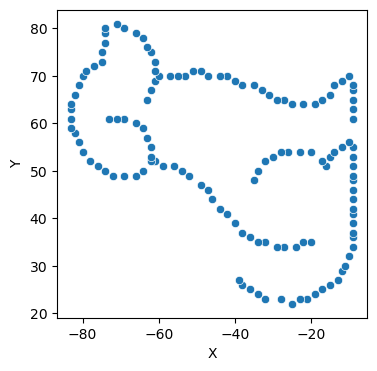

In [201]:
plt.figure(figsize=(4,4))
sns.scatterplot(x=R90['X'],y=R90['Y'])

In [16]:
s90 = sparse_matrix.transpose()

In [17]:
x90 , y90 = s90.nonzero()

<Axes: >

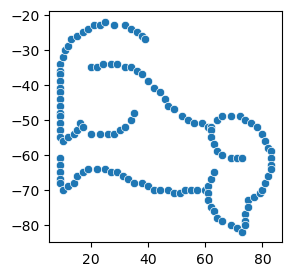

In [18]:
plt.figure(figsize=(4,4))
sns.scatterplot(x=x90,y=-y90)

In [19]:
xm, ym = sparse_matrix.nonzero()

<Axes: >

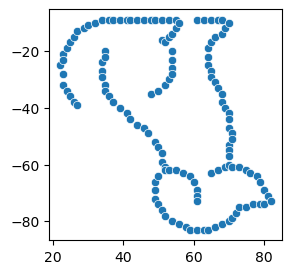

In [20]:
plt.figure(figsize=(4,4))
sns.scatterplot(x=xm,y=-ym)

In [65]:
print(sparse_matrix[50])

  (0, 34)	1
  (0, 54)	1
  (0, 64)	1
  (0, 74)	1
